# Data Visualization in Python
***
Here I will use python to generate some data visualizations. All the graphs are produced using open source frameworks listed below
* Pandas
* Numpy
* Matplotlib
***
I also developed a more interactive data visualization report in javascript

In [1]:
import sys, os
path = os.path.realpath('./scripts/')
sys.path.append(path)
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
# Enable retina images
%config InlineBackend.figure_format = 'retina'
from mung import DataSource

In [2]:
loans_csv = open('input_data/2012_to_2014_loans_data.csv')
institutions_csv = open('input_data/2012_to_2014_institutions_data.csv')

In [3]:
source = DataSource(loans_csv=loans_csv,institutions_csv=institutions_csv)

In [4]:
df = source.hmda_init()
df.head()

Data Quality Report
Total records:1321158


,Agency_Code,Applicant_Income_000,As_of_Year,Census_Tract_Number,County_Code,FFIEC_Median_Family_Income,Loan_Amount_000,MSA_MD,Number_of_Owner_Occupied_Units,Respondent_ID,Sequence_Number,State_Code,Tract_to_MSA_MD_Income_Pct,MSA_MD_Description,Loan_Purpose_Description,Agency_Code_Description,Lien_Status_Description,Loan_Type_Description,State,County_Name,Conforming_Limit_000,Conventional_Status,Conforming_Status,Conventional_Conforming_Flag,Respondent_Name_TS,Loan_Amount_Groupby_Purpose,Income_Group
0,3,84.0,2012,0207.00,79.0,54900.0,94,16620,1545.0,0000000384,390,54,93.07,"CHARLESTON, WV",Refinance,FDIC,First Lien,Conventional,WV,PUTNAM,417.0,Conventional,Conforming,True,THE OHIO VALLEY BANK COMPANY,1,2.0
1,3,84.0,2012,9556.00,43.0,54900.0,133,16620,1548.0,0000000384,422,54,58.00,"CHARLESTON, WV",Refinance,FDIC,First Lien,Conventional,WV,LINCOLN,417.0,Conventional,Conforming,True,THE OHIO VALLEY BANK COMPANY,1,2.0
2,3,53.0,2012,9556.00,43.0,54900.0,70,16620,1548.0,0000000384,425,54,58.00,"CHARLESTON, WV",Refinance,FDIC,First Lien,Conventional,WV,LINCOLN,417.0,Conventional,Conforming,True,THE OHIO VALLEY BANK COMPANY,1,1.0
3,3,85.0,2012,0206.01,79.0,54900.0,102,16620,1935.0,0000000384,432,54,145.21,"CHARLESTON, WV",Refinance,FDIC,First Lien,Conventional,WV,PUTNAM,417.0,Conventional,Conforming,True,THE OHIO VALLEY BANK COMPANY,1,2.0
4,3,38.0,2012,0107.01,39.0,54900.0,112,16620,1492.0,0000000384,478,54,127.96,"CHARLESTON, WV",Purchase,FDIC,First Lien,Conventional,WV,KANAWHA,417.0,Conventional,Conforming,True,THE OHIO VALLEY BANK COMPANY,1,1.0


In [5]:
bank_grouping = df.groupby(['Respondent_Name_TS']).Loan_Amount_000.sum()
bank_grouping.to_csv('competitions.csv')

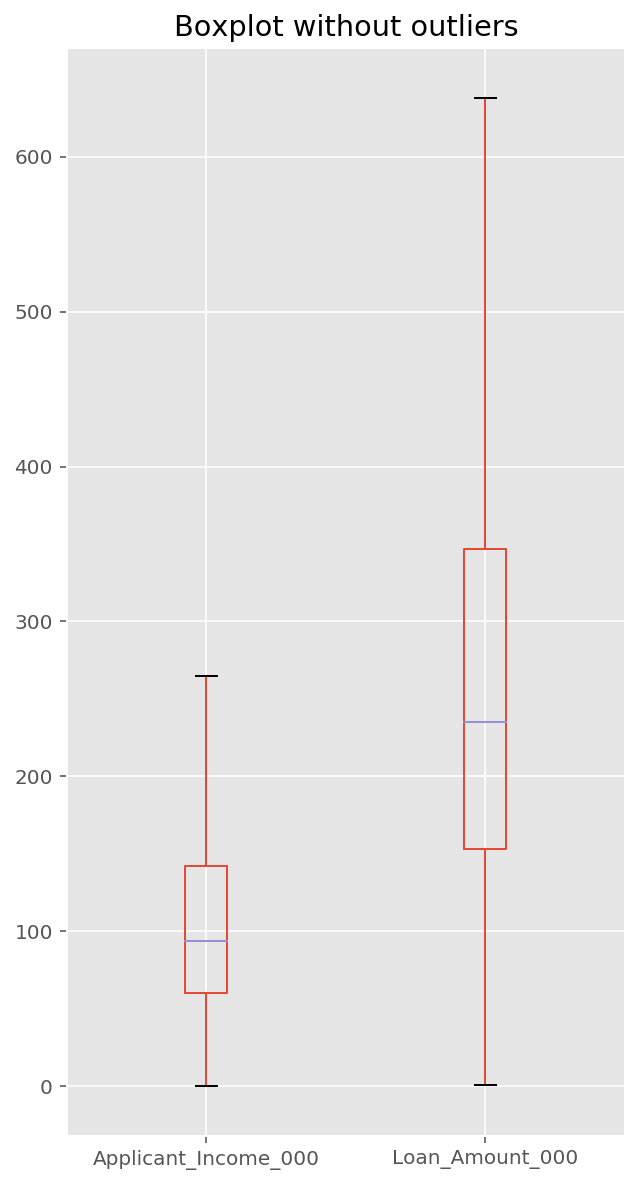

In [6]:
# Visualize app_income data quality
df[['Applicant_Income_000','Loan_Amount_000']].plot.box(showfliers=False,sym='r+',title='Boxplot without outliers',figsize=(5,10))

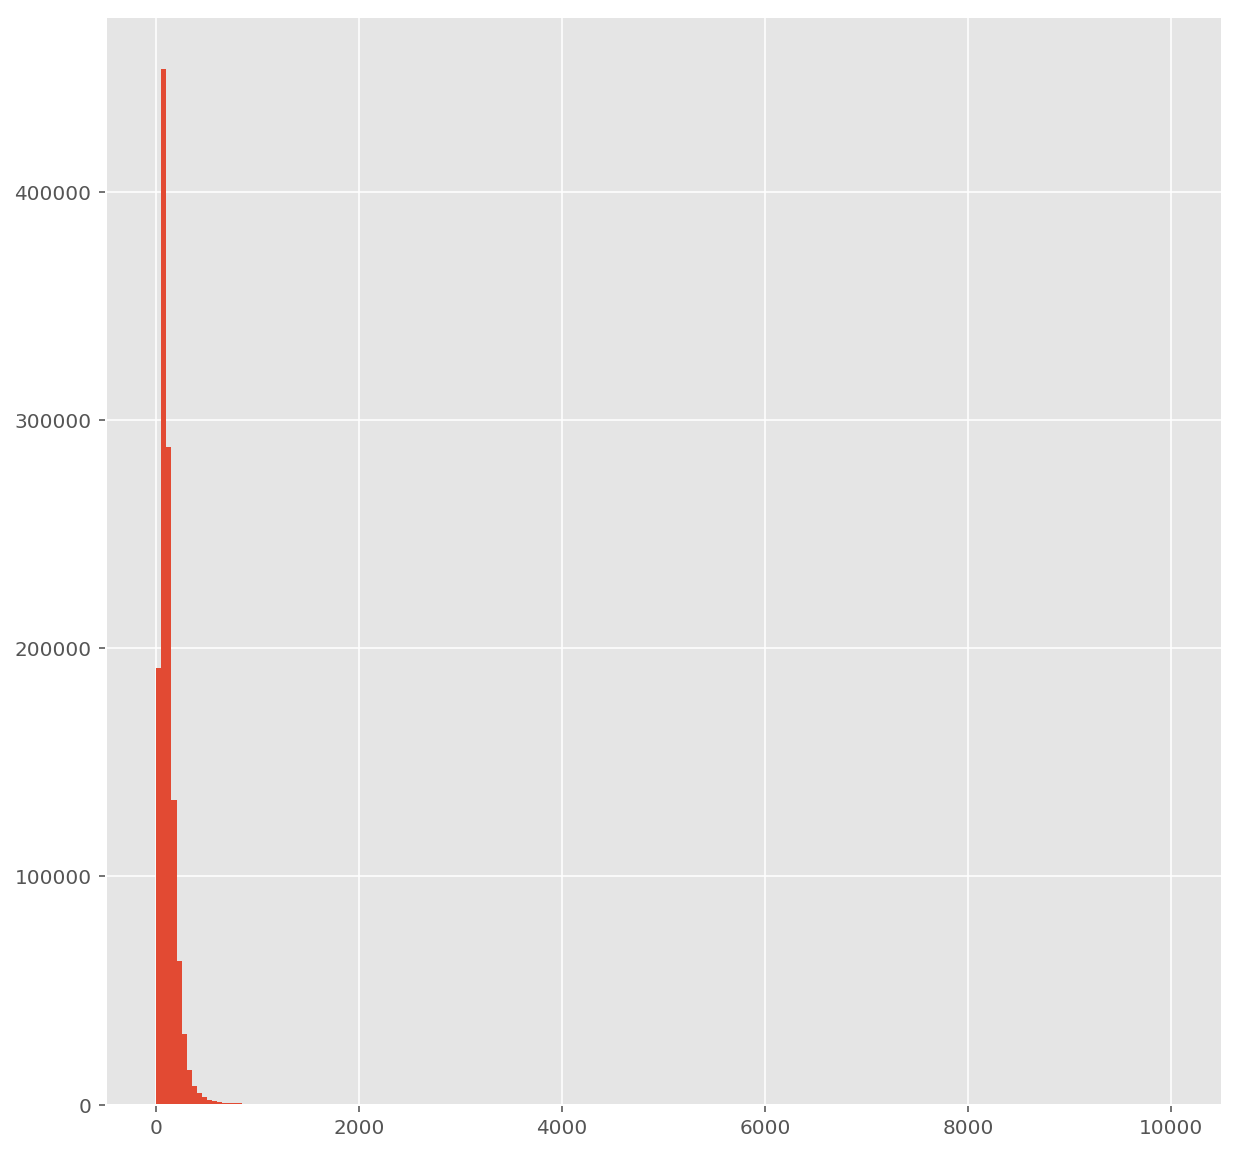

In [7]:
df.Applicant_Income_000.hist(bins=200,figsize=(10,10))

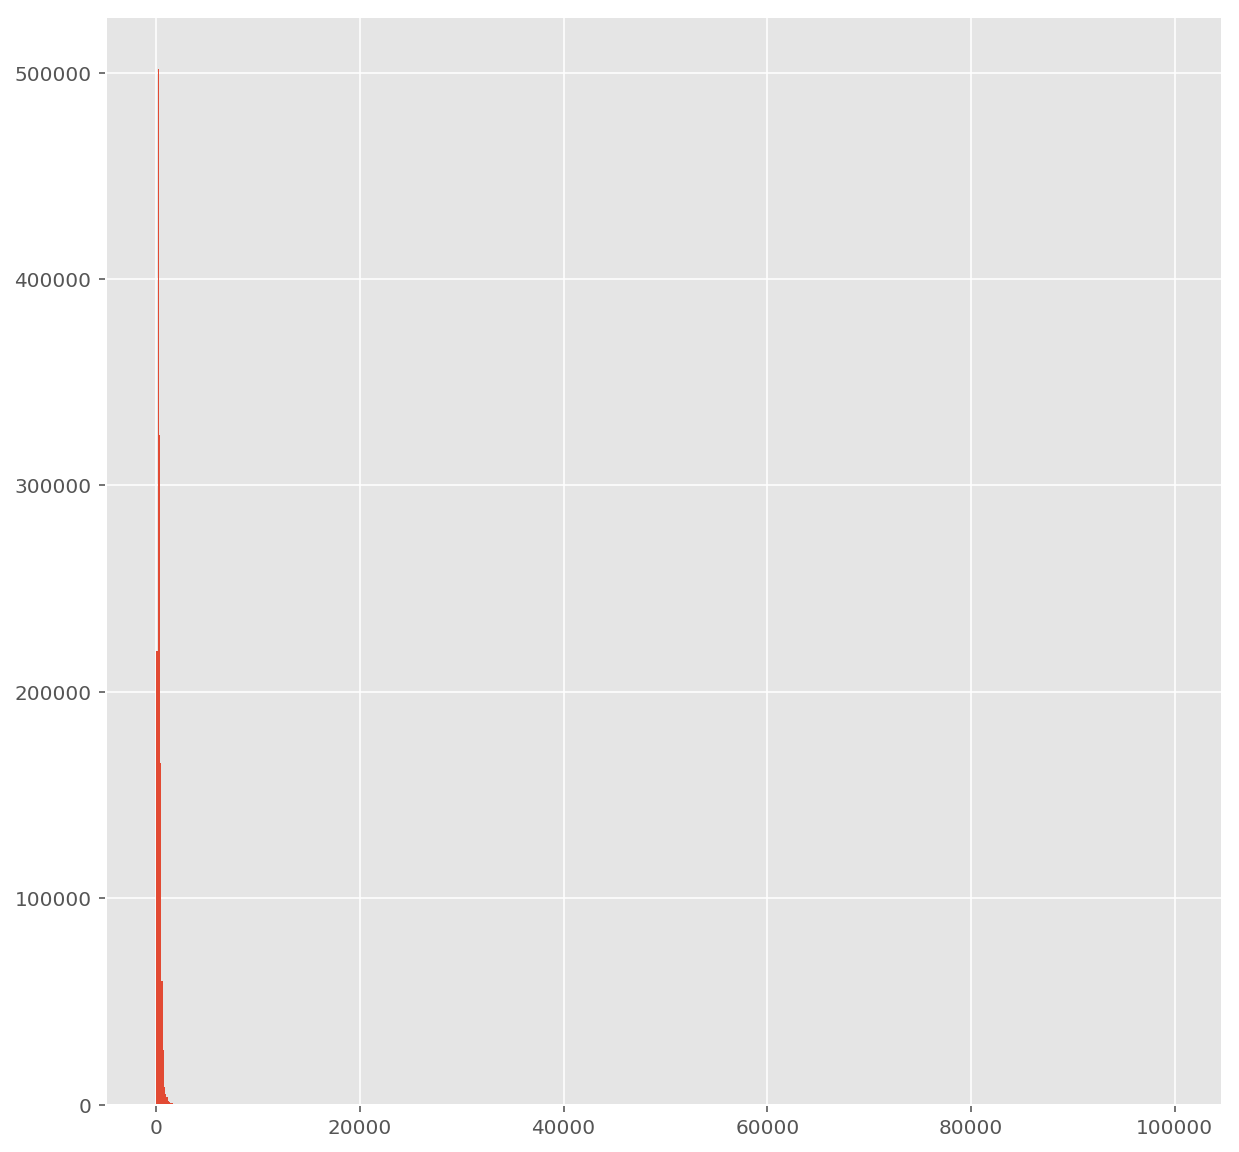

In [8]:
df.Loan_Amount_000.hist(bins=800,figsize=(10,10))

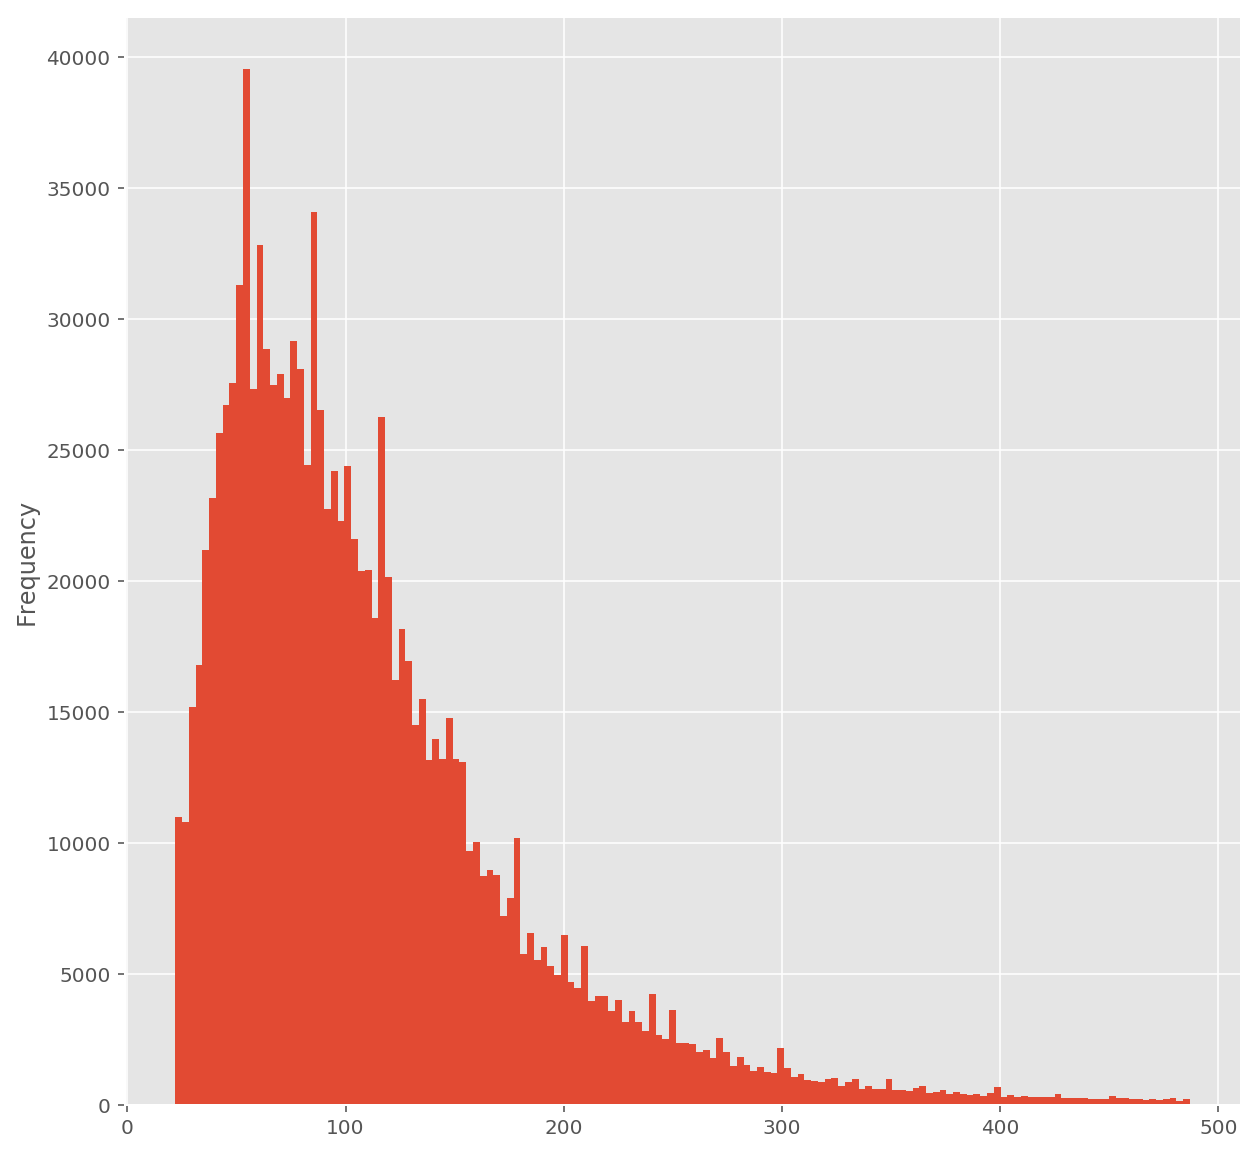

In [9]:
low,high = df.Applicant_Income_000.quantile([0.01,0.99])
df.query('{low}<Applicant_Income_000<{high}'.format(low=low,high=high)).Applicant_Income_000.plot.hist(bins=150,figsize=(10,10))

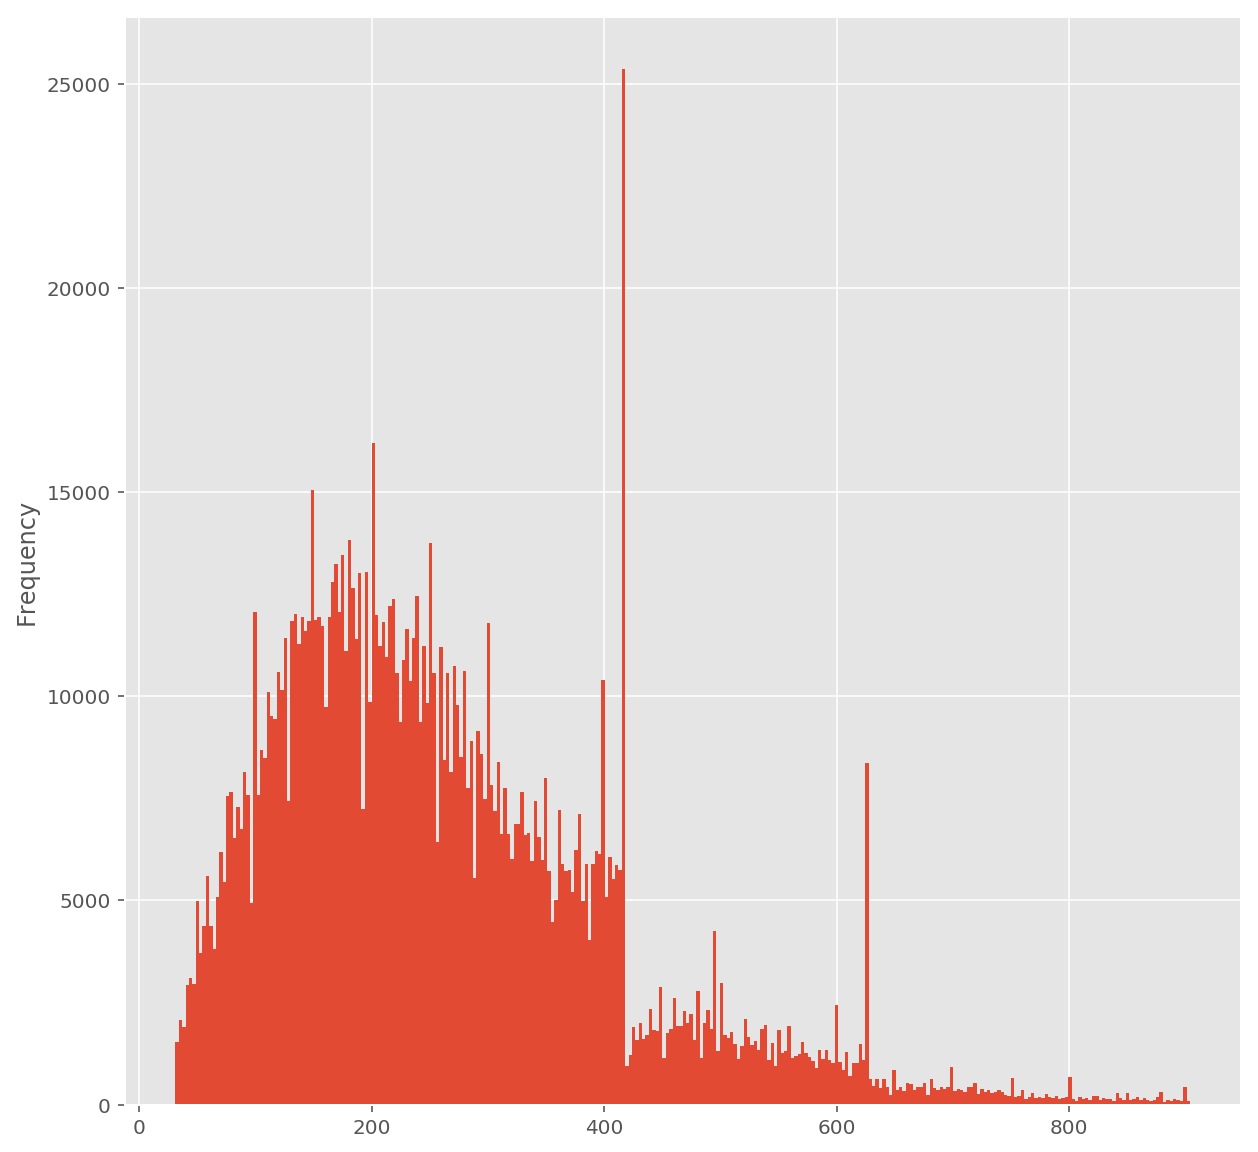

In [10]:
low,high = df.Loan_Amount_000.quantile([0.01,0.99])
df.query('{low}<Loan_Amount_000<{high}'.format(low=low,high=high)).Loan_Amount_000.plot.hist(bins=300,figsize=(10,10))

### Hypothesis: Change Financial should enter the regional market with greatest potential for profit
***
I will determine profit potetial by looking at two key variables
* Market size
* Growth trend

***
Let's first look at market size of each state

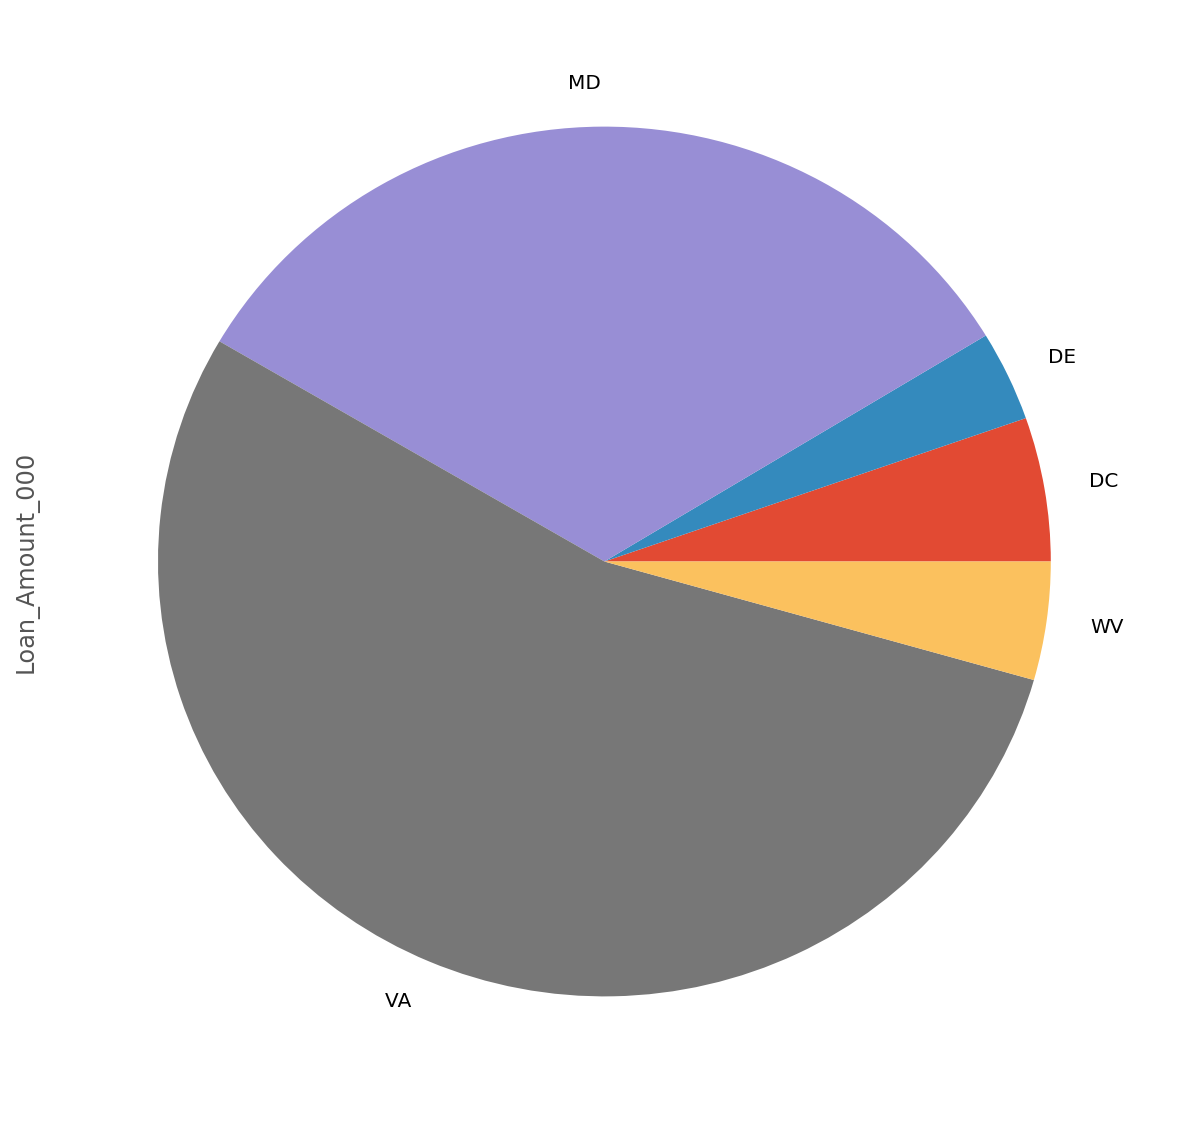

In [12]:
state_grouping = df.groupby(['State'])['Loan_Amount_000'].sum()
state_grouping.plot(kind='pie',figsize=(10,10))

From the above pie chart we can see that Virginia and Maryland has the largest loans market in this area


However, this doesn't necessarily mean Virginia and Maryland are good place to start our loan business


We should also look at the market from a historical perspective

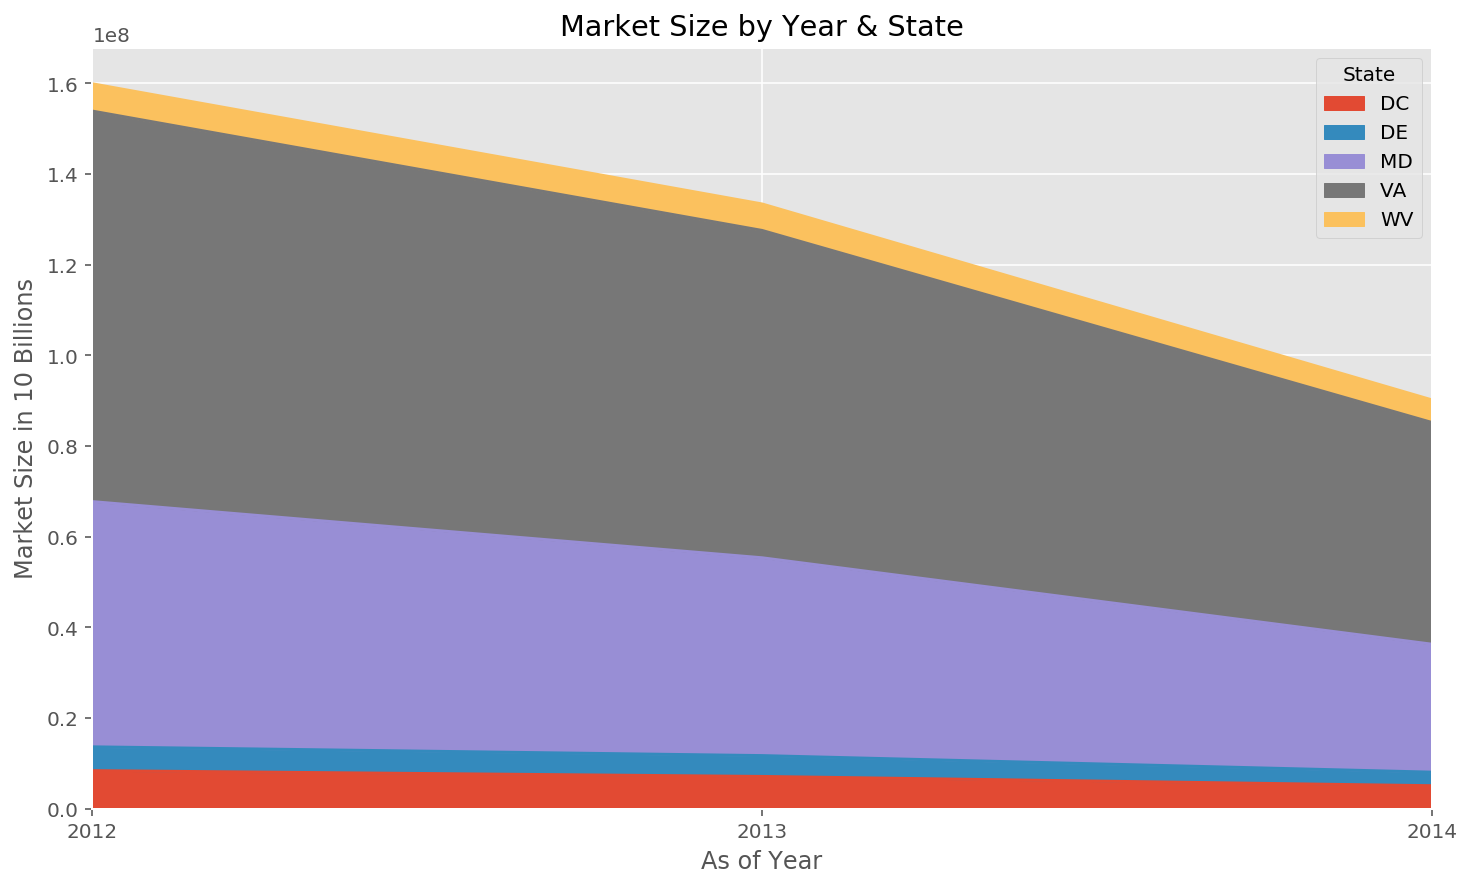

In [13]:
year_state_grouping = df.groupby(['As_of_Year','State'])['Loan_Amount_000'].sum()
year_state_plot = year_state_grouping.unstack().plot(kind='area',stacked=True,title='Market Size by Year & State',figsize=(12,7),xticks=[2012,2013,2014])
year_state_plot.set_xlabel('As of Year')
year_state_plot.set_ylabel('Market Size in 10 Billions')

From the area chart above we can see that, overall, the market for home loans in this area is shrinking between 2012 to 2014

What about individual state market? We can generate a line chart for each state to see how the home loans market behaved during this period of time

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f25da58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ecec588>]], dtype=object)

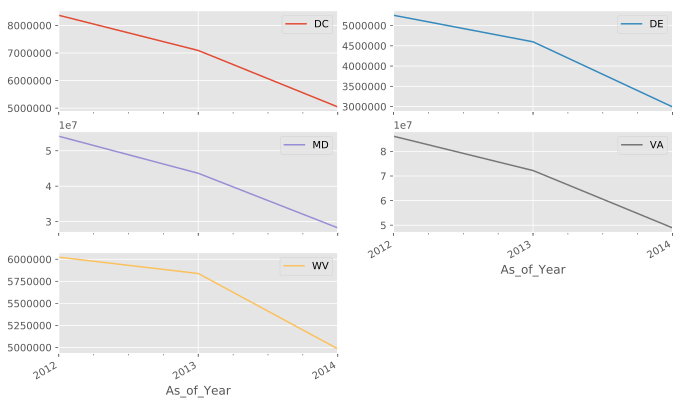

In [26]:
state_year_group = df.groupby(['State','As_of_Year'])['Loan_Amount_000'].sum()
state_year_group = pd.pivot_table(state_year_group.reset_index(),index='As_of_Year',columns='State',values='Loan_Amount_000')
state_year_group.plot(kind='line',subplots=True,grid=True,layout=(3,2),sharex=True,sharey=False,figsize=(11,7),xticks=(2012,2013,2014))

###From above we can see that the home loans market were also shrinking in all the states
What if we keep dividing the markets into even smaller segements? we can look at the loans market at county level

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fc5b6a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1102810b8>]], dtype=object)

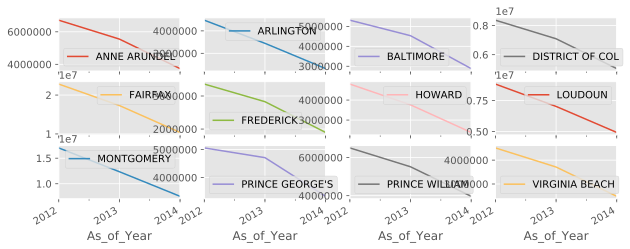

In [59]:
county_year_group = df.groupby(['County_Name','As_of_Year'])['Loan_Amount_000'].sum().nlargest(50)
county_year_group = pd.pivot_table(county_year_group.reset_index(),index='As_of_Year',columns='County_Name',values='Loan_Amount_000').dropna(axis=1)
county_year_group.plot(subplots=True,grid=True,figsize=(10,5),layout=(4,4),xticks=(2012,2013,2014))

As we can see here, home loans market were also shrinking in all of the top 12 counties in the area. Therefore, Change Financial should not enter the home loans market based on the data available here. 